# Moving Earth

SGMS 2025

Libraries:

Note: I used Python 3.11 to correctly run this.

In [4]:
import sys
import random
import math
import pyglet
from pyglet.gl import *
from PIL import Image  # Add Pillow for image processing
import matplotlib.pyplot as plt

Function:

In [5]:
class RotatingEarth:
    def __init__(self):
        self.width, self.height = 900, 600
        self.window = pyglet.window.Window(self.width, self.height, caption="Rotating Earth", resizable=True)
        self.window.set_exclusive_mouse(False)
        self.window.push_handlers(self)
        
        self.radius = 1.5
        self.rotation_speed = 2  # Rotation speed of the Earth
        self.fullscreen = False
        self.perspective_set = False
        self.points = self.generate_points_from_map("earth_map_bw.png")  # Path to the map file
        
        self.angle = 0
        self.fps_display = pyglet.window.FPSDisplay(self.window)
        
        glClearColor(0.0, 0.0, 0.0, 1.0)
        glEnable(GL_DEPTH_TEST)
        glPointSize(2)
        
        pyglet.clock.schedule_interval(self.update, 1/60.0)

    def generate_points_from_map(self, map_file):
        """
        Generate points on the sphere based on a black-and-white map texture.
        White areas (255) represent land; black areas (0) represent water.
        """
        image = Image.open(map_file).convert("L")  # Convert to grayscale
        width, height = image.size
        pixels = image.load()

        points = []
        for y in range(height):
            for x in range(width):
                brightness = pixels[x, y] / 255.0  # Normalized brightness
                if brightness > 0.5:  # Threshold for land
                    # Convert (x, y) to latitude and longitude
                    lon = (x / width) * 361 - 180
                    lat = 90 - (y / height) * 180

                    # Convert latitude and longitude to 3D coordinates
                    x_coord = self.radius * math.cos(math.radians(lat)) * math.cos(math.radians(lon))
                    y_coord = self.radius * math.cos(math.radians(lat)) * math.sin(math.radians(lon))
                    z_coord = self.radius * math.sin(math.radians(lat))
                    
                    points.append((x_coord, y_coord, z_coord))
        return points

    def on_draw(self):
        self.window.clear()
        
        if not self.perspective_set:
            glMatrixMode(GL_PROJECTION)
            glLoadIdentity()
            gluPerspective(90, self.width / float(self.height), 0.1, 1000.0)
            self.perspective_set = True
            
        glMatrixMode(GL_MODELVIEW)
        glLoadIdentity()
        
        glTranslatef(0, 0, -2)  # Move the "camera" back (negative z)  <-- Add this line
        glRotatef(self.angle, 0, 1, 0) # so, now it rotates in its axis.
        
        glBegin(GL_POINTS)
        for x, y, z in self.points:
            glColor3f(0.5, 0.5, 0.5)
            glVertex3f(x, y, z)
        glEnd()
        
        self.fps_display.draw()
    
    def on_resize(self, width, height):
        self.width, self.height = width, height
        glViewport(0, 0, width, height)
        if self.perspective_set:
            glMatrixMode(GL_PROJECTION)
            glLoadIdentity()
            gluPerspective(45, width / float(height), 0.1, 100.0)
            glMatrixMode(GL_MODELVIEW)
    
    def update(self, dt):
        self.angle += self.rotation_speed
    
    def toggle_fullscreen(self):
        self.fullscreen = not self.fullscreen
        self.window.set_fullscreen(self.fullscreen)
    
    def on_key_press(self, symbol, modifiers):
        if symbol == pyglet.window.key.ESCAPE:
            pyglet.app.exit()
        elif symbol == pyglet.window.key.F:
            self.toggle_fullscreen()
    
    def run(self):
        pyglet.app.run()

if __name__ == "__main__":
    app = RotatingEarth()
    app.run()



Let's plot it!

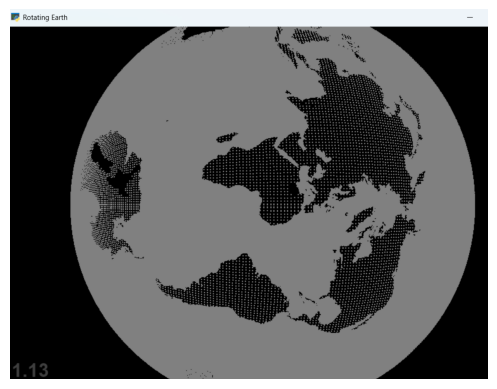

In [6]:
image_path = "example.png"  # Replace with your image path
img = Image.open(image_path)

plt.imshow(img)  # Display the image
plt.axis('off')  # Hide axes (optional)
plt.show()